In [2]:
#import custom classes from decision tree
from decisiontree import DecisionTreeClassifier, DecisionTreeRegressor
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score
#from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes
from metrics import accuracy, mse
from model_selection import train_test_split

# Classification Tree from Scratch

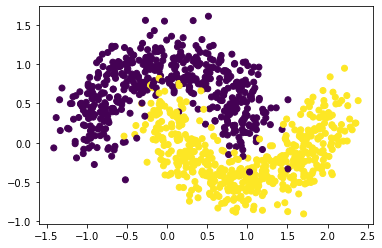

In [3]:
N= 1000
X,Y = make_moons(N, noise=0.2)
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, val=.2)


In [5]:

classifier = DecisionTreeClassifier(min_samples_split=3, max_depth=5)
classifier.fit(X_train,Y_train)
classifier.print_tree()

X_1 <= threshold: 0.093 , info_gain: 0.244
 left:X_0 <= threshold: -0.5178 , info_gain: 0.0924
  left:X_1 <= threshold: 0.0598 , info_gain: 0.045
    left:0
    right:1
  right:X_1 <= threshold: -0.0961 , info_gain: 0.0064
    left:X_1 <= threshold: -0.3391 , info_gain: 0.0002
        left:1
        right:X_1 <= threshold: -0.3336 , info_gain: 0.0175
                left:0
                right:X_1 <= threshold: -0.1733 , info_gain: 0.0004
                                left:1
                                right:1
    right:X_0 <= threshold: 1.1889 , info_gain: 0.0363
        left:X_0 <= threshold: 0.6315 , info_gain: 0.3453
                left:1
                right:X_0 <= threshold: 1.1136 , info_gain: 0.0744
                                left:0
                                right:0
        right:1
 right:X_0 <= threshold: 1.4335 , info_gain: 0.1613
  left:X_1 <= threshold: 0.5464 , info_gain: 0.0163
    left:X_0 <= threshold: 0.5523 , info_gain: 0.0639
        left:X_0 <= t

In [6]:
#test
Y_pred = classifier.predict(X_test) 
print(f"Our implementation of tree from scratch reaches an accuracy of {accuracy(Y_test, Y_pred)*100}%")

Our implementation of tree from scratch reaches an accuracy of 94.5%


### Comparison with sklearn

In [7]:
#import sklearn implementation of classification tree with another name
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn import tree

In [8]:
tree_sklearn = dtc(min_samples_split=3, max_depth=5)
d_C = tree_sklearn.fit(X_train, Y_train)
y_hat = tree_sklearn.predict(X_test)
print(f"With the same parameters, sklearn implementation has an accuracy of {accuracy(Y_test, y_hat)*100}%")

With the same parameters, sklearn implementation has an accuracy of 95.0%


[Text(164.18076923076924, 199.32, 'X[1] <= 0.095\ngini = 0.5\nsamples = 800\nvalue = [399, 401]'),
 Text(64.38461538461539, 163.07999999999998, 'X[0] <= -0.383\ngini = 0.166\nsamples = 339\nvalue = [31, 308]'),
 Text(25.753846153846155, 126.83999999999999, 'X[1] <= 0.072\ngini = 0.095\nsamples = 20\nvalue = [19, 1]'),
 Text(12.876923076923077, 90.6, 'gini = 0.0\nsamples = 18\nvalue = [18, 0]'),
 Text(38.63076923076923, 90.6, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(103.01538461538462, 126.83999999999999, 'X[1] <= -0.094\ngini = 0.072\nsamples = 319\nvalue = [12, 307]'),
 Text(64.38461538461539, 90.6, 'X[1] <= -0.336\ngini = 0.016\nsamples = 250\nvalue = [2, 248]'),
 Text(51.50769230769231, 54.359999999999985, 'gini = 0.0\nsamples = 139\nvalue = [0, 139]'),
 Text(77.26153846153846, 54.359999999999985, 'X[1] <= -0.333\ngini = 0.035\nsamples = 111\nvalue = [2, 109]'),
 Text(64.38461538461539, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(90.13846153846154,

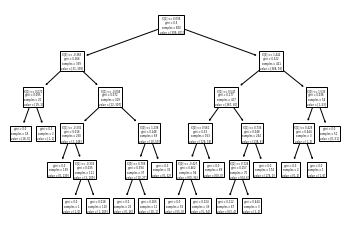

In [9]:
tree.plot_tree(d_C)

# Regression Tree from Scratch

In [10]:
data = load_diabetes()
x = data.data
y = data.target
y = y.reshape(-1,1)

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, val=.2)

In [12]:
regressor = DecisionTreeRegressor(min_samples_split=3, max_depth=5)
regressor.fit(X_train,Y_train)
regressor.print_tree()

X_2 <= threshold: 0.0067 , info_gain: 1598.9976
 left:X_8 <= threshold: -0.0042 , info_gain: 845.6637
  left:X_6 <= threshold: 0.0192 , info_gain: 251.1678
    left:X_4 <= threshold: 0.0493 , info_gain: 500.3099
        left:X_1 <= threshold: -0.0446 , info_gain: 265.5881
                left:200
                right:104
        right:230
    right:X_2 <= threshold: -0.017 , info_gain: 103.1585
        left:X_2 <= threshold: -0.0655 , info_gain: 89.7034
                left:48
                right:65
        right:X_8 <= threshold: -0.0236 , info_gain: 69.5859
                left:53
                right:88
  right:X_3 <= threshold: 0.0356 , info_gain: 337.2329
    left:X_6 <= threshold: -0.025 , info_gain: 427.9224
        left:X_6 <= threshold: -0.0618 , info_gain: 538.338
                left:101
                right:131
        right:X_4 <= threshold: 0.0934 , info_gain: 566.3429
                left:185
                right:202
    right:X_0 <= threshold: 0.0526 , info_gain: 

In [13]:
y_hat = regressor.predict(X_test)
print(f"Our implementation of tree from scratch reaches a MSE of {mse(Y_test, y_hat)}")


Our implementation of tree from scratch reaches a MSE of 1114922.1460674158


### Comparison with sklearn

In [14]:
#import sklearn implementation of classification tree with another name
from sklearn.tree import DecisionTreeRegressor as dtr

In [15]:
tree_sklearn = dtr(min_samples_split=3, max_depth=5)
d_R = tree_sklearn.fit(X_train, Y_train)
y_hat = tree_sklearn.predict(X_test)
print(f"With the same parameters, sklearn implementation has a MSE of {mse(Y_test, y_hat)}")

With the same parameters, sklearn implementation has a MSE of 940292.2748993227


In [19]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, y_hat)*len(Y_test)

1176686.0690118943

[Text(177.8625, 199.32, 'X[2] <= 0.008\nmse = 5806.184\nsamples = 353\nvalue = 151.232'),
 Text(88.93125, 163.07999999999998, 'X[8] <= -0.004\nmse = 3707.542\nsamples = 227\nvalue = 121.441'),
 Text(38.362500000000004, 126.83999999999999, 'X[6] <= 0.021\nmse = 2159.981\nsamples = 139\nvalue = 98.302'),
 Text(20.925, 90.6, 'X[4] <= 0.063\nmse = 2893.029\nsamples = 66\nvalue = 114.97'),
 Text(13.950000000000001, 54.359999999999985, 'X[1] <= 0.003\nmse = 2463.359\nsamples = 64\nvalue = 111.016'),
 Text(6.9750000000000005, 18.119999999999976, 'mse = 3013.152\nsamples = 32\nvalue = 127.312'),
 Text(20.925, 18.119999999999976, 'mse = 1382.39\nsamples = 32\nvalue = 94.719'),
 Text(27.900000000000002, 54.359999999999985, 'mse = 132.25\nsamples = 2\nvalue = 241.5'),
 Text(55.800000000000004, 90.6, 'X[2] <= -0.016\nmse = 1018.973\nsamples = 73\nvalue = 83.233'),
 Text(41.85, 54.359999999999985, 'X[2] <= -0.065\nmse = 1062.292\nsamples = 61\nvalue = 87.738'),
 Text(34.875, 18.119999999999976, 'ms

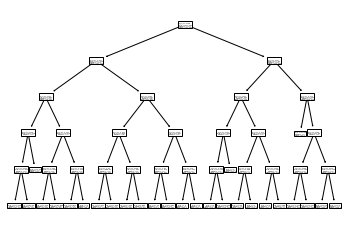

In [17]:
tree.plot_tree(d_R)